In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB.csv")
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,repertoire_type,class
0,SRR5233637,CASSPRVTSGTYEQYF,32.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000010,0.0,0.0,0.000000,polyclonal,T_cell_poor_polyclonal
1,SRR5233637,CASSYSDRGGQPQHF,13.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000004,0.0,0.0,0.000000,polyclonal,T_cell_poor_polyclonal
2,SRR5233637,CASKVALGGETQYF,25.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000008,0.0,0.0,0.000000,polyclonal,T_cell_poor_polyclonal
3,SRR5233637,CASRAPGTGTLGSPLHF,66.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000022,0.0,0.0,0.000000,polyclonal,T_cell_poor_polyclonal
4,SRR5233637,CASSSGQGGPSTEAFF,52.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,84.0,315.0,544.0,0.000017,0.0,0.0,0.000000,polyclonal,T_cell_poor_polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375331,sample14,CASSESPAFGEKLFF,0.0,0.0,0.0,3.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000000,0.0,0.0,0.008547,polyclonal,T_cell_poor_polyclonal
375332,sample14,CASSWTGSQETQYF,0.0,0.0,0.0,2.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000000,0.0,0.0,0.005698,polyclonal,T_cell_poor_polyclonal
375333,sample14,CASRTGLAGGIGELFF,0.0,0.0,0.0,2.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000000,0.0,0.0,0.005698,polyclonal,T_cell_poor_polyclonal
375334,sample14,CASSVEGYEQYF,0.0,0.0,0.0,2.0,melanoma,T_cell_poor,749686.0,113.0,152.0,351.0,0.000000,0.0,0.0,0.005698,polyclonal,T_cell_poor_polyclonal


## MIXCR

In [3]:
MIXCR = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','frequency_TCR','frequency_MIXCR']]
MIXCR = MIXCR.loc[(MIXCR['frequency_TCR'] != 0) & (MIXCR['frequency_MIXCR'] != 0)]

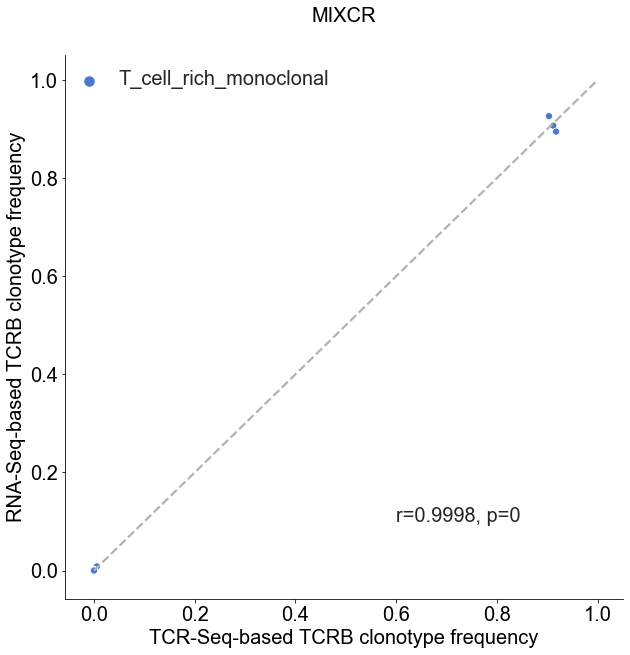

In [4]:
T_cell_rich_monoclonal_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_rich_monoclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_MIXCR', hue='class', s=50, data=T_cell_rich_monoclonal_MIXCR, palette=['#4878d0'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('MIXCR',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_rich_monoclonal_MIXCR['frequency_TCR'], T_cell_rich_monoclonal_MIXCR['frequency_MIXCR'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_a1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_a1.png",bbox_inches="tight")

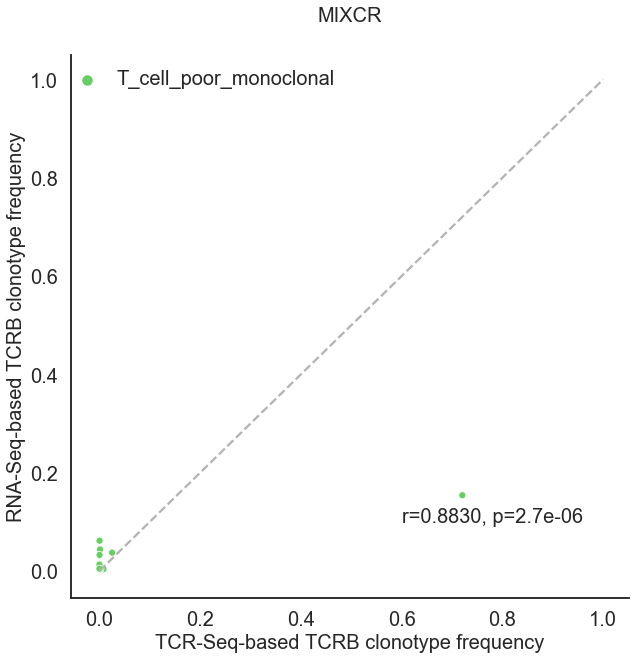

In [5]:
T_cell_poor_monoclonal_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_poor_monoclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_MIXCR', hue='class', s=50, data=T_cell_poor_monoclonal_MIXCR, palette=['#6acc64'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('MIXCR',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_poor_monoclonal_MIXCR['frequency_TCR'], T_cell_poor_monoclonal_MIXCR['frequency_MIXCR'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_b1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_b1.png",bbox_inches="tight")

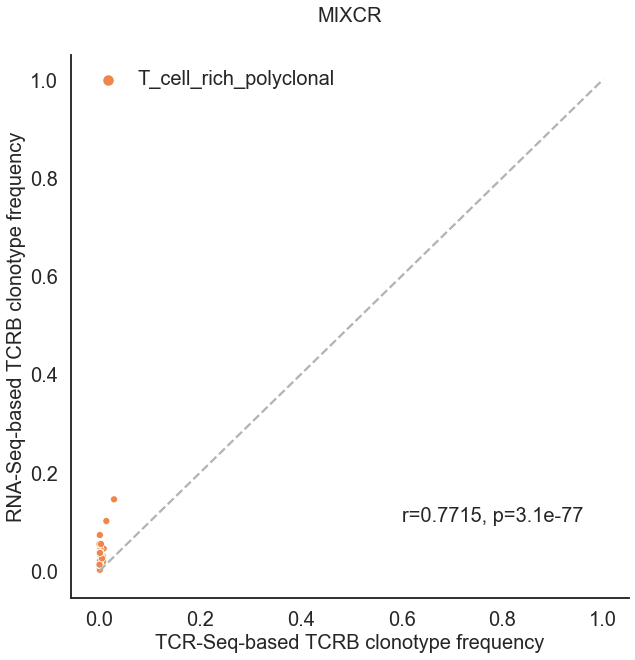

In [6]:
T_cell_rich_polyclonal_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_rich_polyclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_MIXCR', hue='class', s=50, data=T_cell_rich_polyclonal_MIXCR, palette=['#ee854a'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")
    
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)

g.axes.set_title('MIXCR',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_rich_polyclonal_MIXCR['frequency_TCR'], T_cell_rich_polyclonal_MIXCR['frequency_MIXCR'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_c1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_c1.png",bbox_inches="tight")

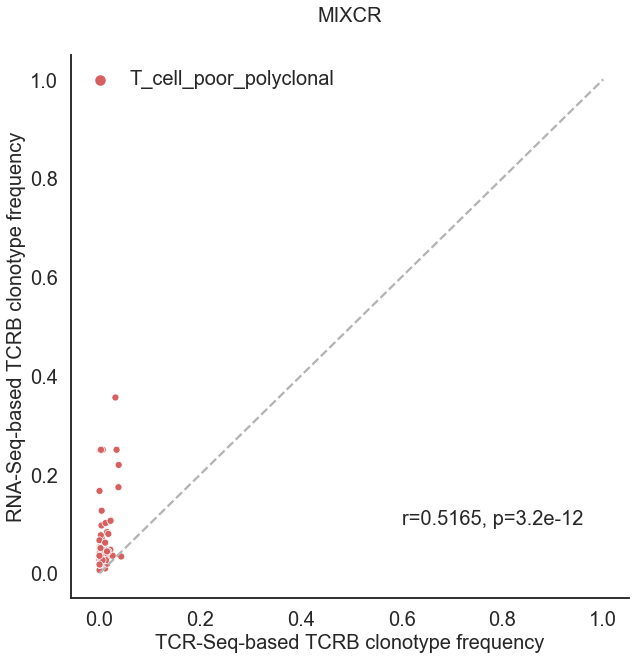

In [7]:
T_cell_poor_polyclonal_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_poor_polyclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_MIXCR', hue='class', s=50, data=T_cell_poor_polyclonal_MIXCR, palette=['#d65f5f'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('MIXCR',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_poor_polyclonal_MIXCR['frequency_TCR'], T_cell_poor_polyclonal_MIXCR['frequency_MIXCR'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS7_b1.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS7_b1.png",bbox_inches="tight")

## IMREP

In [8]:
IMREP = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','frequency_TCR','frequency_IMREP']]
IMREP = IMREP.loc[(IMREP['frequency_TCR'] != 0) & (IMREP['frequency_IMREP'] != 0)]

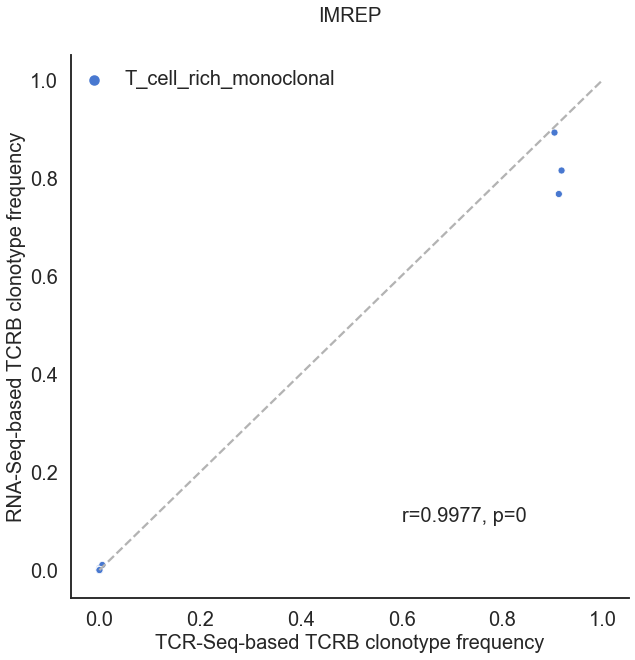

In [9]:
T_cell_rich_monoclonal_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_rich_monoclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_IMREP', hue='class', s=50, data=T_cell_rich_monoclonal_IMREP, palette=['#4878d0'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('IMREP',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_rich_monoclonal_IMREP['frequency_TCR'], T_cell_rich_monoclonal_IMREP['frequency_IMREP'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_a2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_a2.png",bbox_inches="tight")

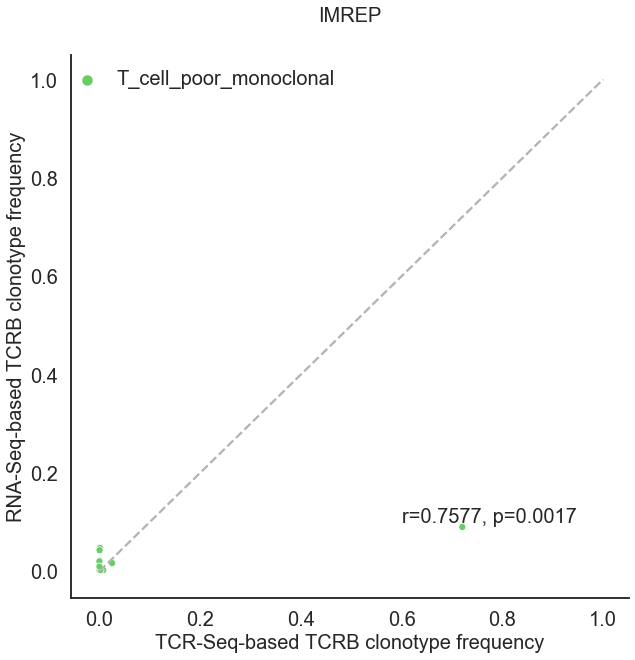

In [10]:
T_cell_poor_monoclonal_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_poor_monoclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_IMREP', hue='class', s=50, data=T_cell_poor_monoclonal_IMREP, palette=['#6acc64'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('IMREP',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_poor_monoclonal_IMREP['frequency_TCR'], T_cell_poor_monoclonal_IMREP['frequency_IMREP'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_b2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_b2.png",bbox_inches="tight")

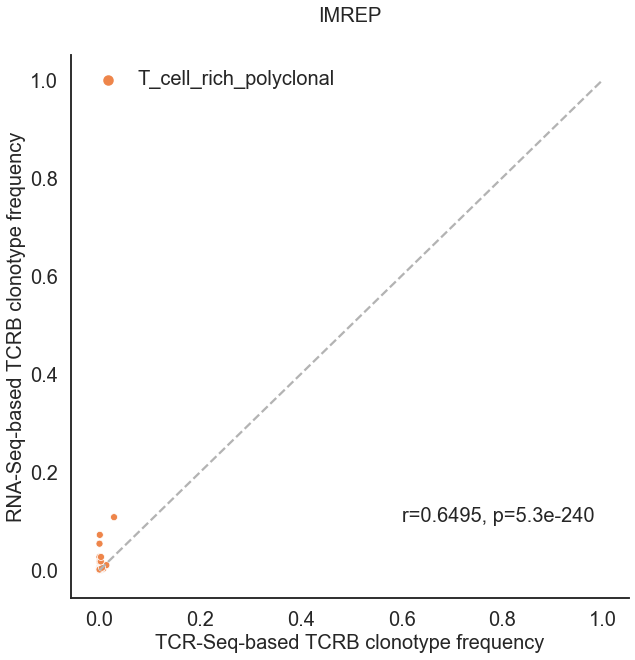

In [11]:
T_cell_rich_polyclonal_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_rich_polyclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_IMREP', hue='class', s=50, data=T_cell_rich_polyclonal_IMREP, palette=['#ee854a'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('IMREP',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_rich_polyclonal_IMREP['frequency_TCR'], T_cell_rich_polyclonal_IMREP['frequency_IMREP'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_c2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_c2.png",bbox_inches="tight")

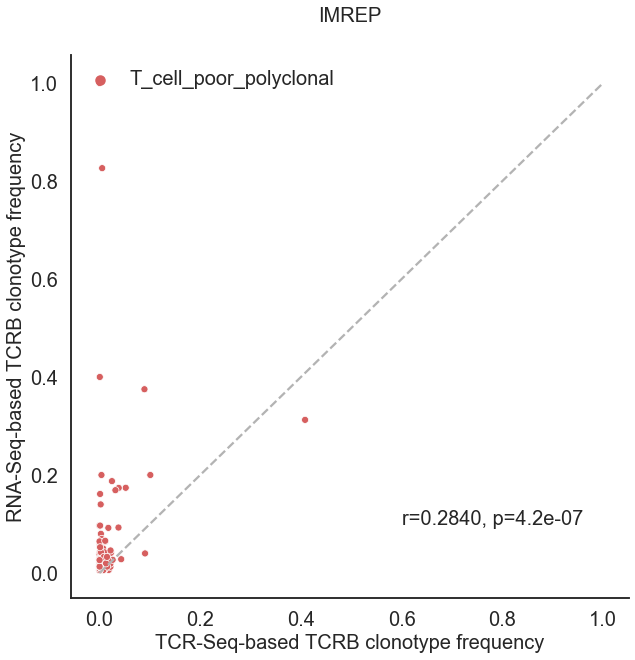

In [12]:
T_cell_poor_polyclonal_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_poor_polyclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_IMREP', hue='class', s=50, data=T_cell_poor_polyclonal_IMREP, palette=['#d65f5f'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('IMREP',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_poor_polyclonal_IMREP['frequency_TCR'], T_cell_poor_polyclonal_IMREP['frequency_IMREP'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS7_b2.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS7_b2.png",bbox_inches="tight")

## TRUST4

In [13]:
TRUST4 = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','frequency_TCR','frequency_TRUST4']]
TRUST4 = TRUST4.loc[(TRUST4['frequency_TCR'] != 0) & (TRUST4['frequency_TRUST4'] != 0)]

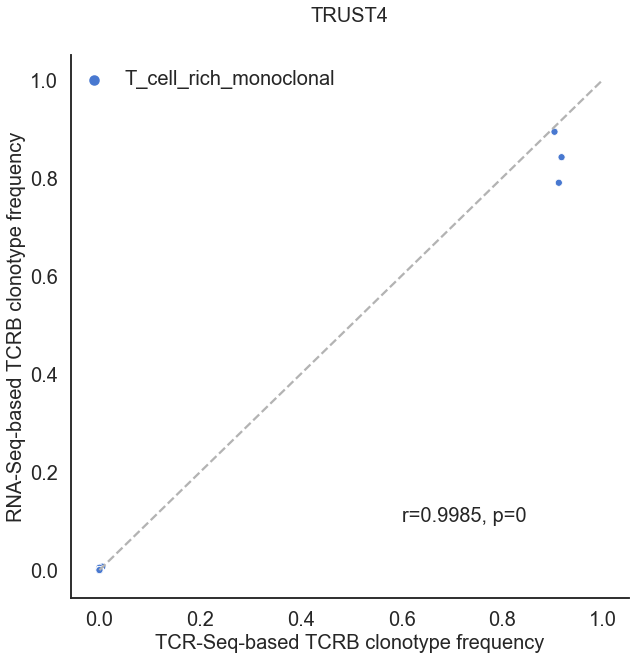

In [14]:
T_cell_rich_monoclonal_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_rich_monoclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_TRUST4', hue='class', s=50, data=T_cell_rich_monoclonal_TRUST4, palette=['#4878d0'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('TRUST4',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_rich_monoclonal_TRUST4['frequency_TCR'], T_cell_rich_monoclonal_TRUST4['frequency_TRUST4'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_a3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_a3.png",bbox_inches="tight")

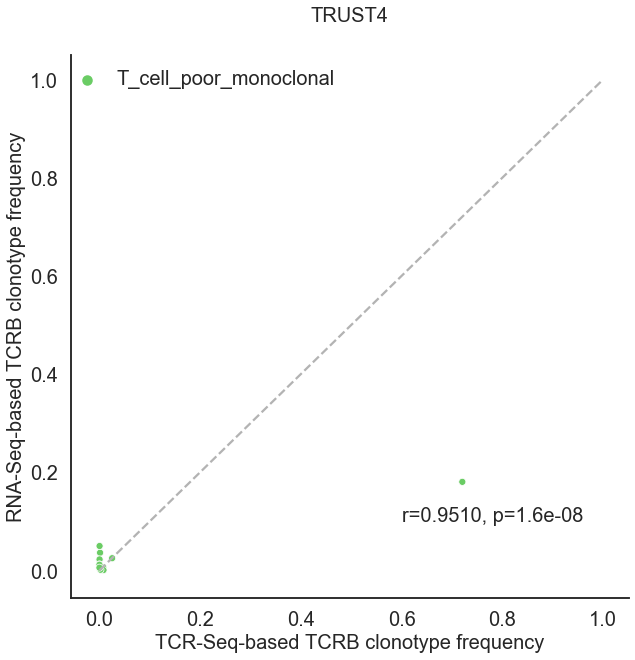

In [15]:
T_cell_poor_monoclonal_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_poor_monoclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_TRUST4', hue='class', s=50, data=T_cell_poor_monoclonal_TRUST4, palette=['#6acc64'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('TRUST4',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_poor_monoclonal_TRUST4['frequency_TCR'], T_cell_poor_monoclonal_TRUST4['frequency_TRUST4'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_b3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_b3.png",bbox_inches="tight")

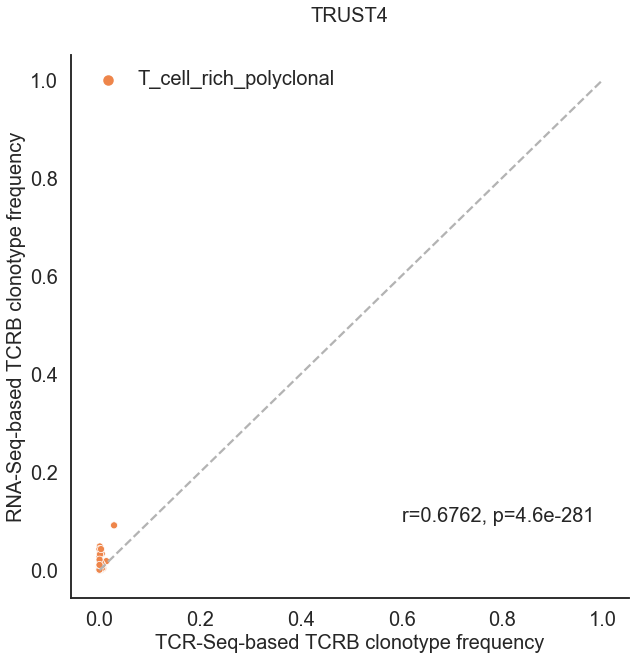

In [16]:
T_cell_rich_polyclonal_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_rich_polyclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_TRUST4', hue='class', s=50, data=T_cell_rich_polyclonal_TRUST4, palette=['#ee854a'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('TRUST4',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_rich_polyclonal_TRUST4['frequency_TCR'], T_cell_rich_polyclonal_TRUST4['frequency_TRUST4'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/main/figure3_c3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure3_c3.png",bbox_inches="tight")

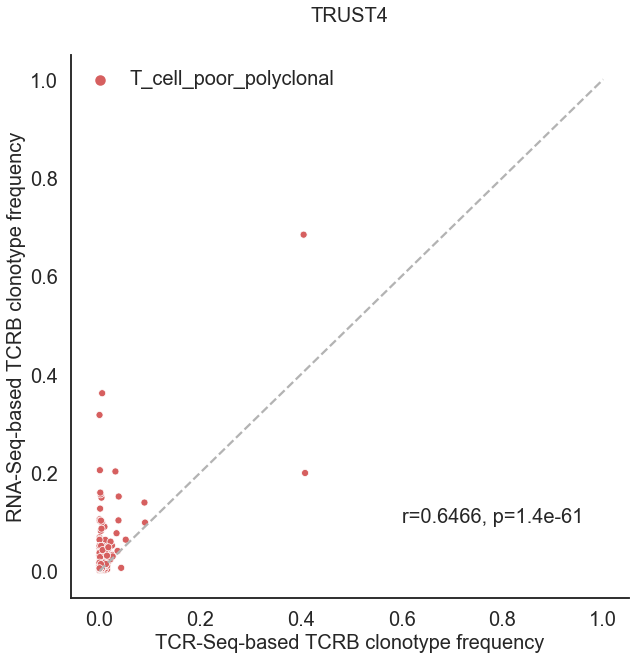

In [17]:
T_cell_poor_polyclonal_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_poor_polyclonal')]
f, ax = plt.subplots(figsize=(10,10))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='frequency_TCR', y='frequency_TRUST4', hue='class', s=50, data=T_cell_poor_polyclonal_TRUST4, palette=['#d65f5f'])
g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[1:], labels[1:], loc='upper right', bbox_to_anchor=(0.5, 1), frameon=False)
    
g.axes.set_title('TRUST4',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=20)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
sns.despine()

r, p = stats.pearsonr(T_cell_poor_polyclonal_TRUST4['frequency_TCR'], T_cell_poor_polyclonal_TRUST4['frequency_TRUST4'])
plt.text(0.6,0.1,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=20)

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS7_b3.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS7_b3.png",bbox_inches="tight")